In [1]:
import networkx as nx
import numpy as np
import math

# matplotlib setting
%matplotlib inline
import matplotlib.pyplot as plt

# to print logs in jupyter notebook
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

# load GraphRicciCuravture package
from GraphRicciCurvature.OllivierRicci import OllivierRicci
from GraphRicciCurvature.FormanRicci import FormanRicci


# load python-louvain for modularity computation
import community.community_louvain as community_louvain

# for ARI computation
from sklearn import preprocessing, metrics

In [2]:
G = nx.karate_club_graph()


In [3]:
orc = OllivierRicci(G, alpha=0.5, verbose="TRACE")


In [4]:
orc.compute_ricci_curvature()
G_orc = orc.G.copy() 

TRACE:Number of nodes: 34
TRACE:Number of edges: 78
TRACE:Start to compute all pair shortest path.
TRACE:0.041072 secs for all pair by NetworKit.
INFO:0.407764 secs for Ricci curvature computation.


Karate Club Graph, first 5 edges: 
Ricci curvature of edge (0,1) is 0.279687
Ricci curvature of edge (0,2) is -0.071030
Ricci curvature of edge (0,3) is 0.169361
Ricci curvature of edge (0,4) is -0.190698
Ricci curvature of edge (0,5) is -0.129378


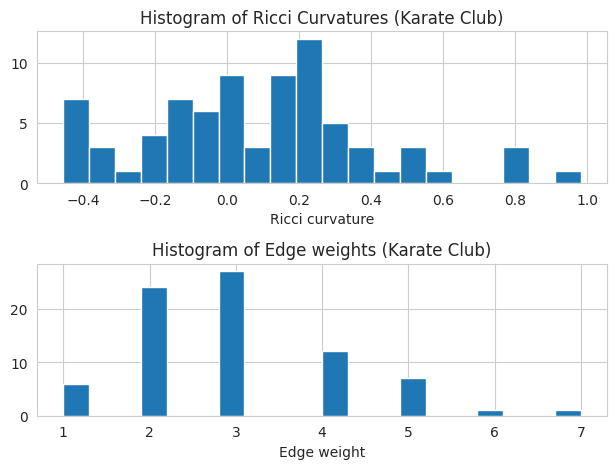

In [5]:
def show_results(G, curvature="ricciCurvature"):

    # Print the first five results
    print("Karate Club Graph, first 5 edges: ")
    for n1,n2 in list(G.edges())[:5]:
        print("Ricci curvature of edge (%s,%s) is %f" % (n1 ,n2, G[n1][n2][curvature]))

    # Plot the histogram of Ricci curvatures
    plt.subplot(2, 1, 1)
    ricci_curvtures = nx.get_edge_attributes(G, curvature).values()
    plt.hist(ricci_curvtures,bins=20)
    plt.xlabel('Ricci curvature')
    plt.title("Histogram of Ricci Curvatures (Karate Club)")

    # Plot the histogram of edge weights
    plt.subplot(2, 1, 2)
    weights = nx.get_edge_attributes(G, "weight").values()
    plt.hist(weights,bins=20)
    plt.xlabel('Edge weight')
    plt.title("Histogram of Edge weights (Karate Club)")

    plt.tight_layout()

show_results(G_orc)